In [1]:
import os
import warnings
from matplotlib import rc
import matplotlib as mpl
import numpy as np


rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [3]:
import os
os.listdir('../235745_parking_data/')

['age_gender_info.csv',
 'test_df.csv',
 'test.csv',
 'train_df_errno.csv',
 'train.csv',
 'sample_submission.csv']

In [4]:
import pandas as pd
# error processed dataframe from daniel
# train = pd.read_csv("../235745_parking_data/train_df_errno.csv")
# test = pd.read_csv("../235745_parking_data/test_df.csv")

train = pd.read_csv("../235745_parking_data/train.csv")
test = pd.read_csv("../235745_parking_data/test.csv")
sub = pd.read_csv("../235745_parking_data/sample_submission.csv")
age = pd.read_csv("../235745_parking_data/age_gender_info.csv")

train.shape, test.shape, sub.shape, age.shape

((2952, 15), (1022, 14), (150, 2), (16, 23))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

In [7]:
mapper = {"도보 10분거리 내 지하철역 수(환승노선 수 반영)":"10분내지하철수", 
         "도보 10분거리 내 버스정류장 수":"10분내버스정류장수"}

train.rename(columns=mapper, inplace=True)
test.rename(columns=mapper, inplace=True)

print(train.columns)
print(test.columns)

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수'],
      dtype='object')
Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수'],
      dtype='object')


In [8]:
train['임대건물구분'].unique()

array(['아파트', '상가'], dtype=object)

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,2952.0,886.661247,513.540168,26.00,513.50,779.00,1106.0000,2568.0
전용면적,2952.0,44.757215,31.874280,12.62,32.10,39.93,51.5625,583.4
전용면적별세대수,2952.0,102.747967,132.640159,1.00,14.00,60.00,144.0000,1865.0
공가수,2952.0,12.921070,10.778831,0.00,4.00,11.00,20.0000,55.0
10분내지하철수,2741.0,0.176578,0.427408,0.00,0.00,0.00,0.0000,3.0
10분내버스정류장수,2948.0,3.695726,2.644665,0.00,2.00,3.00,4.0000,20.0
단지내주차면수,2952.0,601.668360,396.407072,13.00,279.25,517.00,823.0000,1798.0
등록차량수,2952.0,559.768293,433.375027,13.00,220.00,487.00,770.0000,2550.0


1. 건물의 연식에 따라서 등록가능한 주차차량수(max)
2. 

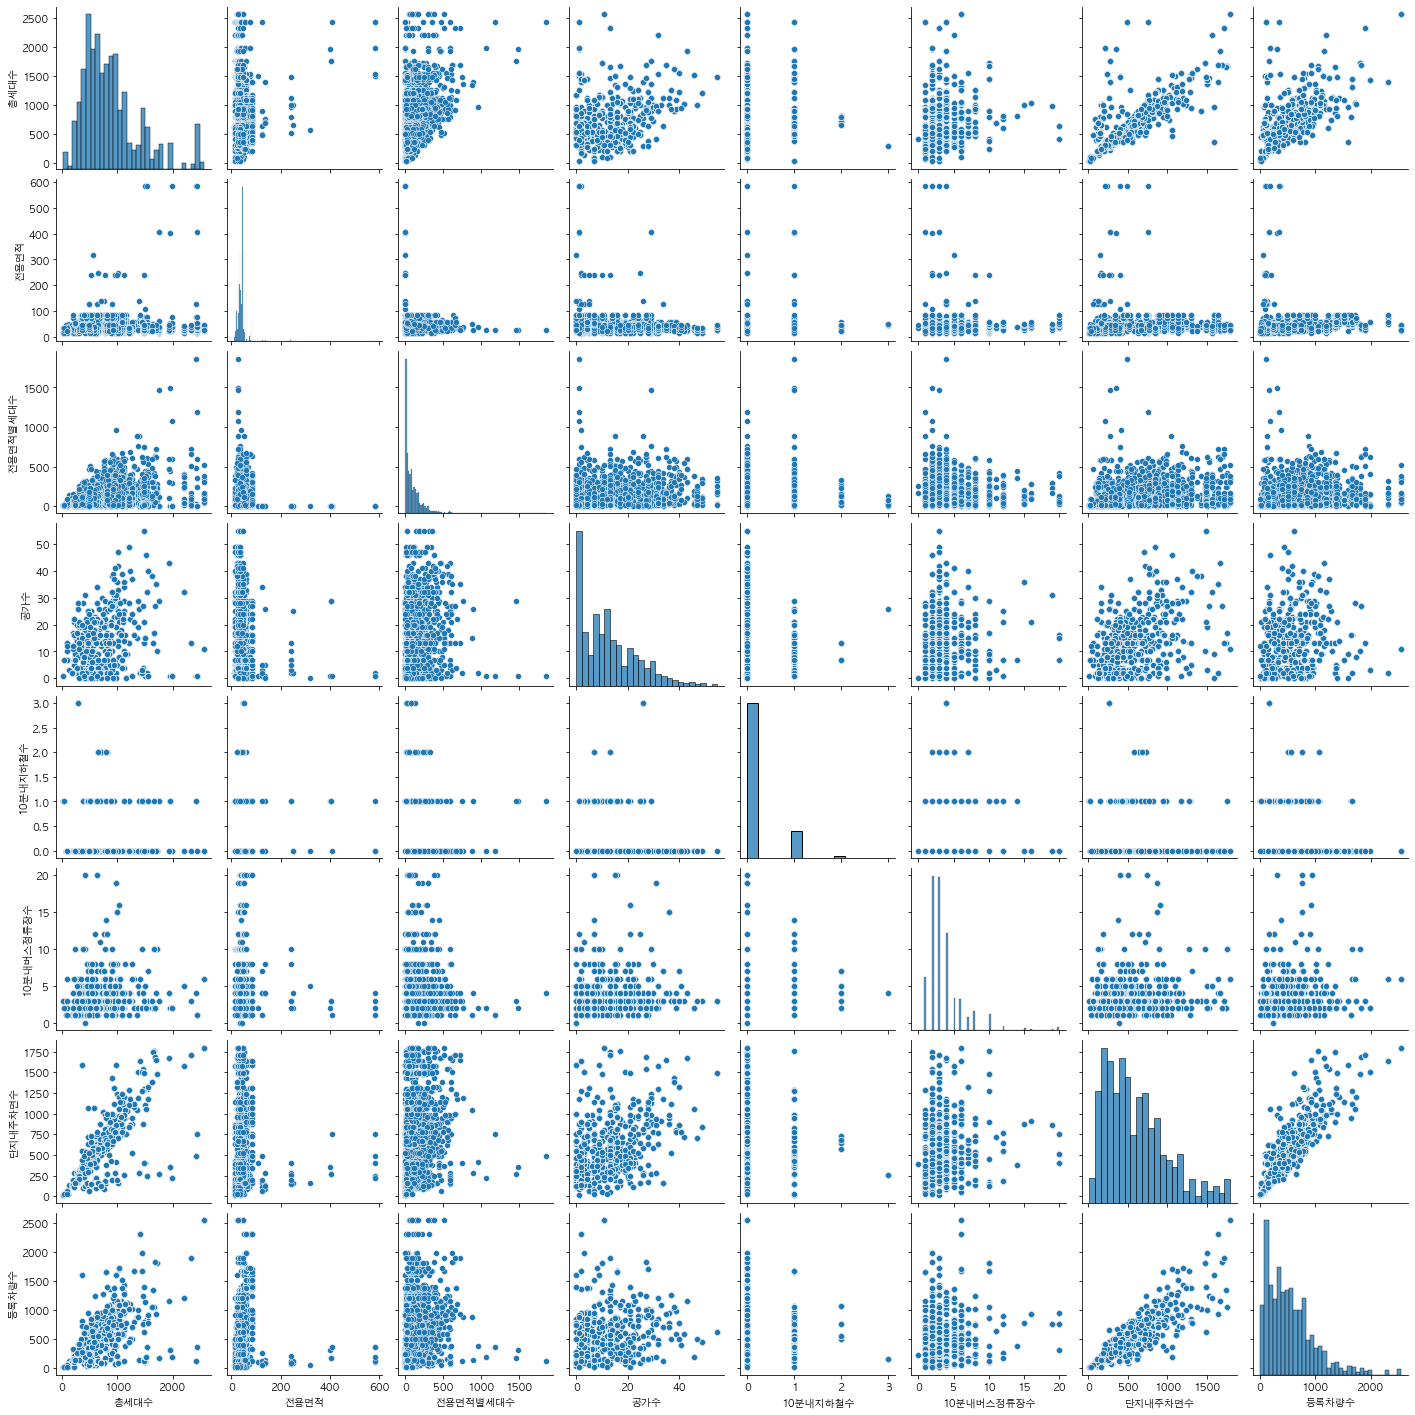

In [10]:
sns.pairplot(train)

In [11]:
train["등록차량수"].isnull().sum()

0

In [12]:
train.corr()

,총세대수,전용면적,전용면적별세대수,공가수,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
총세대수,1.000000,0.042271,0.098205,0.068192,0.213843,-0.001446,0.501488,0.316703
전용면적,0.042271,1.000000,-0.035479,-0.089201,-0.013111,-0.007866,0.071260,0.115453
전용면적별세대수,0.098205,-0.035479,1.000000,0.166472,-0.056680,0.047112,0.281989,0.247085
공가수,0.068192,-0.089201,0.166472,1.000000,-0.093334,0.043285,0.289819,0.118121
10분내지하철수,0.213843,-0.013111,-0.056680,-0.093334,1.000000,0.098380,-0.055544,-0.108592
10분내버스정류장수,-0.001446,-0.007866,0.047112,0.043285,0.098380,1.000000,0.070696,0.103752
단지내주차면수,0.501488,0.071260,0.281989,0.289819,-0.055544,0.070696,1.000000,0.859216
등록차량수,0.316703,0.115453,0.247085,0.118121,-0.108592,0.103752,0.859216,1.000000


## ERROR 1
- 문제 : 전용면적별 세대수 != 총 세대수
- 원인 : 분양과 임대가 혼합되어 발생, 분양완료된 상가/아파트가 총세대수에는 포함되고, 전용면적별 세대수에는 포함되지 않음

In [13]:
np.sort(train['단지코드'].unique())

array(['C1000', 'C1004', 'C1005', 'C1013', 'C1014', 'C1015', 'C1017',
       'C1022', 'C1024', 'C1026', 'C1027', 'C1032', 'C1036', 'C1039',
       'C1045', 'C1046', 'C1048', 'C1049', 'C1056', 'C1057', 'C1059',
       'C1065', 'C1068', 'C1077', 'C1084', 'C1085', 'C1089', 'C1095',
       'C1102', 'C1103', 'C1109', 'C1122', 'C1129', 'C1131', 'C1133',
       'C1136', 'C1141', 'C1143', 'C1155', 'C1156', 'C1163', 'C1171',
       'C1173', 'C1175', 'C1176', 'C1177', 'C1180', 'C1184', 'C1194',
       'C1206', 'C1207', 'C1210', 'C1213', 'C1218', 'C1227', 'C1234',
       'C1236', 'C1244', 'C1258', 'C1263', 'C1268', 'C1269', 'C1281',
       'C1284', 'C1286', 'C1301', 'C1307', 'C1309', 'C1310', 'C1312',
       'C1316', 'C1319', 'C1320', 'C1326', 'C1328', 'C1329', 'C1338',
       'C1340', 'C1341', 'C1343', 'C1344', 'C1350', 'C1357', 'C1360',
       'C1363', 'C1365', 'C1368', 'C1375', 'C1379', 'C1386', 'C1394',
       'C1397', 'C1402', 'C1406', 'C1407', 'C1410', 'C1424', 'C1426',
       'C1428', 'C14

In [14]:
err = train[["단지코드","총세대수","전용면적별세대수"]]
total = err.groupby("단지코드").mean()[["총세대수"]]
separ = err.groupby("단지코드").sum()[["전용면적별세대수"]]

err_df = total.merge(separ, left_on=total.index, right_on=separ.index, how='left')
err_df.rename(index=err_df["key_0"], inplace=True)
err_df.drop("key_0",axis=1, inplace=True)
err_df

,총세대수,전용면적별세대수
C1000,566.0,566
C1004,521.0,521
C1005,1144.0,1144
C1013,1308.0,1308
C1014,996.0,996
...,...,...
C2663,772.0,772
C2666,1084.0,1084
C2670,648.0,648
C2680,758.0,758


In [15]:
err_notequal = err_df[err_df['총세대수'] != err_df["전용면적별세대수"]]
err_notequal["차이"] = err_df["총세대수"] - err_df["전용면적별세대수"]
err_notequal

,총세대수,전용면적별세대수,차이
C1024,680.0,477,203.0
C1068,806.0,805,1.0
C1156,1004.0,998,6.0
C1206,755.0,488,267.0
C1218,1048.0,1040,8.0
C1312,518.0,517,1.0
C1344,424.0,300,124.0
C1424,625.0,624,1.0
C1490,749.0,655,94.0
C1584,1227.0,1220,7.0


count     40.000000
mean      56.450000
std      111.198356
min        1.000000
25%        2.000000
50%        5.000000
75%       11.750000
max      452.000000
Name: 차이, dtype: float64


<AxesSubplot:>

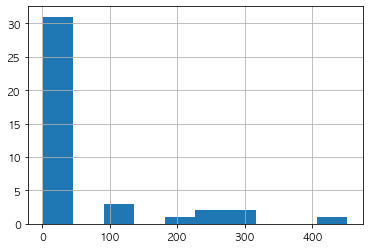

In [16]:
print(err_notequal["차이"].describe())
err_notequal["차이"].hist()


>  ※ 차이가 94~452세대인 10개 단지(크기순) : ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]  
> ※ 별첨 : 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']

In [17]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [30]:
below_10 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
above_10 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']

cate = []
for one in below_10 :
    cate.extend(train.loc[train["단지코드"]==one,"공급유형"].unique())

for one in above_10:
    cate.extend(train.loc[train["단지코드"]==one,"공급유형"].unique())
    
set(cate)

{'공공임대(10년)',
 '공공임대(50년)',
 '공공임대(5년)',
 '공공임대(분납)',
 '국민임대',
 '영구임대',
 '임대상가',
 '행복주택'}

## ERROR 2
- 문제 : 동일한 단지임에도 불구하고 단지코드가 2개 부여됨
- 원인 : 1번과 마찬가지로 분양과 임대가 혼합되어 발생
- 동일한 단지에 코드가 2개 부여된 단지 코드 (3쌍) : 
|train set|train/test set|
|:--:|:--:|
|['C2085', 'C1397'], <br> ['C2431', 'C1649']| ['C1036'/ 'C2675'] |
- 참고 :  주차면수는 하나의 단지임을 전제로 산정한 것이고 총 세대수는 두 개 단지의 합계  
 다만 등록차량대수는 ['C2085', 'C1397'] 단지의 경우 동일 수치, ['C2431', 'C1649']] 단지의 경우 두 개 단지 합계입니다. 
![error](https://user-images.githubusercontent.com/38090151/126156807-4c2f82c1-1e37-4d86-8329-ea202670e42c.png)

In [37]:
train[(train['단지코드']=='C2085')|(train["단지코드"]== 'C1397')] 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
2043,C1397,370,아파트,서울특별시,장기전세,23.32,51,9.0,A,87444000,-,0.0,3.0,1590.0,1595.0
2044,C1397,370,아파트,서울특별시,장기전세,46.79,4,9.0,A,174888000,-,0.0,3.0,1590.0,1595.0
2045,C1397,370,아파트,서울특별시,장기전세,46.91,69,9.0,A,174888000,-,0.0,3.0,1590.0,1595.0
2046,C1397,370,아파트,서울특별시,장기전세,51.96,24,9.0,A,194562000,-,0.0,3.0,1590.0,1595.0
2047,C1397,370,아파트,서울특별시,장기전세,51.99,80,9.0,A,194562000,-,0.0,3.0,1590.0,1595.0
2048,C1397,370,아파트,서울특별시,장기전세,59.93,142,9.0,A,216423000,-,0.0,3.0,1590.0,1595.0
2186,C2085,969,아파트,서울특별시,공공임대(10년),51.96,63,0.0,A,47001000,602270,0.0,3.0,1590.0,1595.0
2187,C2085,969,아파트,서울특별시,공공임대(10년),51.99,41,0.0,A,47001000,602270,0.0,3.0,1590.0,1595.0
2188,C2085,969,아파트,서울특별시,공공임대(10년),59.93,315,0.0,A,61210000,695170,0.0,3.0,1590.0,1595.0
2189,C2085,969,아파트,서울특별시,공공임대(분납),74.80,208,0.0,A,120611000,293490,0.0,3.0,1590.0,1595.0


In [38]:
# 'C1649'의 `10분내지하철수`, `10분내버스정류장수` 의 nan처리 가능할 것으로 보임
train[(train['단지코드']=='C2431')|(train["단지코드"]== 'C1649')] 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0
2372,C2431,472,아파트,경상남도,국민임대,36.77,272,16.0,A,11217000,233330,0.0,2.0,1066.0,359.0
2373,C2431,472,아파트,경상남도,국민임대,46.78,200,16.0,A,24389000,303220,0.0,2.0,1066.0,359.0


In [46]:
test[(test["단지코드"]== 'C2675')|()] 
# train[train['단지코드']=='C1036']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
579,C2675,512,아파트,경기도,국민임대,36.65,130,9.0,A,18476000,154790,0.0,3.0,1016.0
580,C2675,512,아파트,경기도,국민임대,46.90,44,9.0,A,34082000,232200,0.0,3.0,1016.0
581,C2675,512,아파트,경기도,국민임대,46.90,80,9.0,A,34082000,232200,0.0,3.0,1016.0
582,C2675,512,아파트,경기도,국민임대,46.90,50,9.0,A,34082000,232200,0.0,3.0,1016.0
583,C2675,512,아파트,경기도,국민임대,46.90,88,9.0,A,34082000,232200,0.0,3.0,1016.0
584,C2675,512,아파트,경기도,국민임대,47.40,30,9.0,A,34082000,232200,0.0,3.0,1016.0
585,C2675,512,아파트,경기도,국민임대,51.93,75,9.0,A,43819000,275900,0.0,3.0,1016.0
586,C2675,512,아파트,경기도,국민임대,51.93,15,9.0,A,43819000,275900,0.0,3.0,1016.0


In [45]:
train[train['단지코드']=='C1036']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
1502,C1036,742,아파트,경기도,국민임대,36.65,135,13.0,A,18476000,154790,0.0,3.0,1016.0,1279.0
1503,C1036,742,아파트,경기도,국민임대,46.90,45,13.0,A,34082000,232200,0.0,3.0,1016.0,1279.0
1504,C1036,742,아파트,경기도,국민임대,46.90,171,13.0,A,34082000,232200,0.0,3.0,1016.0,1279.0
1505,C1036,742,아파트,경기도,국민임대,46.90,81,13.0,A,34082000,232200,0.0,3.0,1016.0,1279.0
1506,C1036,742,아파트,경기도,국민임대,46.90,90,13.0,A,34082000,232200,0.0,3.0,1016.0,1279.0
1507,C1036,742,아파트,경기도,국민임대,51.93,184,13.0,A,43819000,275900,0.0,3.0,1016.0,1279.0
1508,C1036,742,아파트,경기도,국민임대,51.93,36,13.0,A,43819000,275900,0.0,3.0,1016.0,1279.0


## ERROR 3
- 문제 : 단지코드 등 기입 실수로 데이터 정제 과정에서 매칭 오류 발생  
> ※ 실수가 발생한 단지 코드 (9개 단지) : 

|test set| train set|
|:--:|:--:|
|'C2335', 'C1327' | 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988'|

## 처리 방안
-  1번 오류의 경우 해당 사실을 감안하여 분석을 진행해 주시기 바라며, 2, 3번 오류의 경우에는 문제가 된 단지들을 트레인셋에서 제외하기를 권장드리고, 테스트셋에서는 평가 시 제외하고자 합니다.
- 테스트셋에서 평가 제외되는 데이터는 'C2675'(2번 사항에 해당), 'C2335', 'C1327'(3번 사항에 해당) 3개 단지입니다.

> ERROR 전처리 해야겠네...  
> 강사님 전처리 과정 확인해서 dataset 사용하기 [링크](https://github.com/LDJWJ/parking_demand_competion)    
> (21.07.19 update) 내가 전처리한 거 사용하기 - 위치 : dacon-data   